## Clustering (Unsupervised Machine Learning)

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.

In [2]:
# Importing the data
import pandas as pd
DataIris = pd.read_csv('/content/Iris.csv')

DataIris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Keeping the target variable for future reference
TargetVariable=DataIris['Species']

# Dropping the target variable to get only predictors
OnlyPredictors=DataIris.drop('Species', axis=1)

OnlyPredictors.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [6]:
# Taking out only the Predictor variables
y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:10])

[[ 1.   5.1  3.5  1.4  0.2]
 [ 2.   4.9  3.   1.4  0.2]
 [ 3.   4.7  3.2  1.3  0.2]
 [ 4.   4.6  3.1  1.5  0.2]
 [ 5.   5.   3.6  1.4  0.2]
 [ 6.   5.4  3.9  1.7  0.4]
 [ 7.   4.6  3.4  1.4  0.3]
 [ 8.   5.   3.4  1.5  0.2]
 [ 9.   4.4  2.9  1.4  0.2]
 [10.   4.9  3.1  1.5  0.1]]


### Finding the best number of clusters based on the inertia value

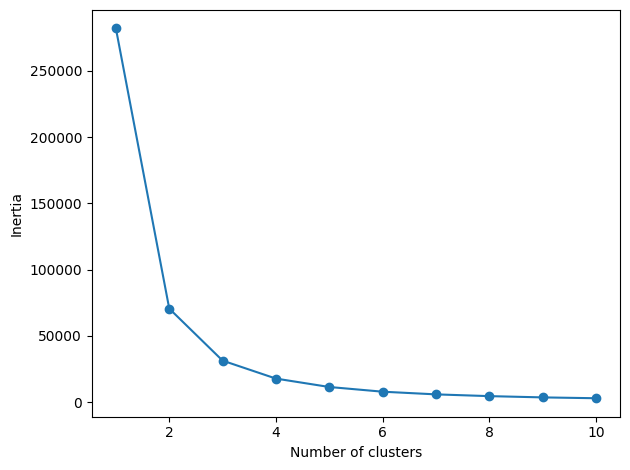

In [7]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='random',
                n_init=10,
                max_iter=300,
                tol=0.0001,
                random_state=0)

    km.fit(X)
    inertiaValue.append(km.inertia_)

plt.plot(range(1, 11), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

### Using above graph deciding optimal number of clusters

In [ ]:
# Defining the K-Means object for best number of clusters. n=3 in this case
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=3)

In [ ]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

C:\Users\SAPTARSHI m\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
Inertia: 78.85144142614601


In [ ]:
DataIris['PredictedClusterID']=predictedCluster
DataIris.tail(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PredictedClusterID
140,6.7,3.1,5.6,2.4,virginica,1
141,6.9,3.1,5.1,2.3,virginica,1
142,5.8,2.7,5.1,1.9,virginica,0
143,6.8,3.2,5.9,2.3,virginica,1
144,6.7,3.3,5.7,2.5,virginica,1
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1
149,5.9,3.0,5.1,1.8,virginica,0


### Visualizing the clusters using any two columns in data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


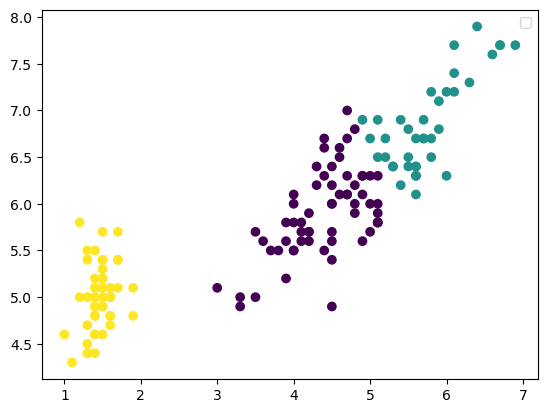

In [ ]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=DataIris['Petal.Length'], y=DataIris['Sepal.Length'], c=DataIris['PredictedClusterID'])
plt.legend()

## Hierarchical Clustering

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   PredictedClusterID  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


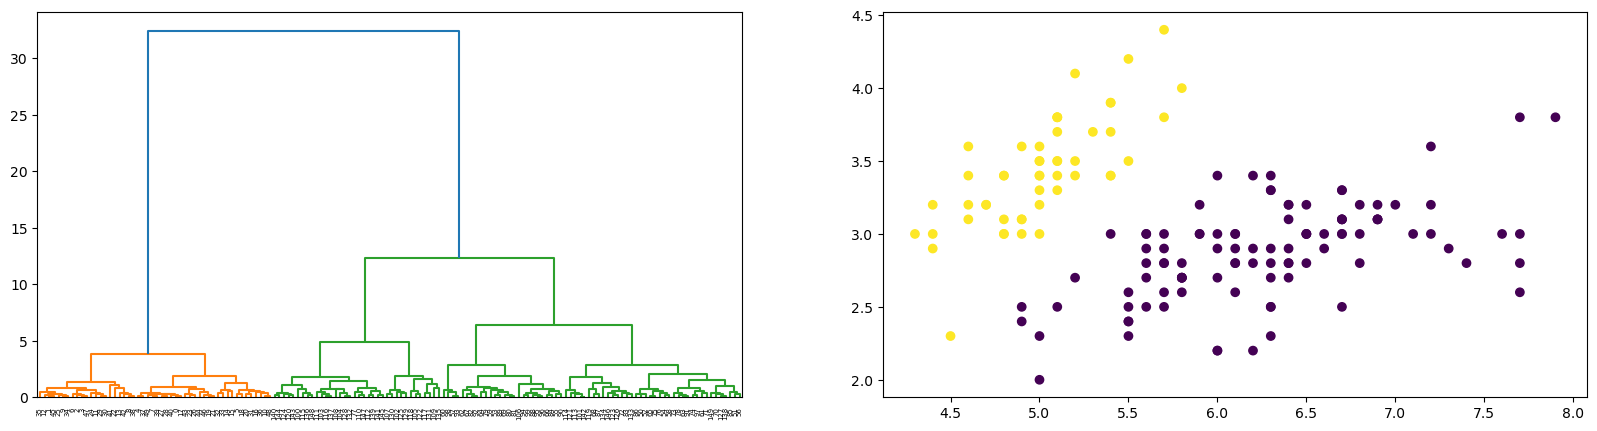

In [ ]:
# Hierarchical Clustering
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlots=plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), ax=subPlots[0])


##################################################################
# Creating 3 Clusters Based on the above dendogram visually
# Bottom-Up hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, metric = 'euclidean', linkage = 'ward')

# Generating cluster id for each row using agglomerative algorithm
DataIris['PredictedClusterID']=hc.fit_predict(X)
print(DataIris.head())

# Plotting the predicted clusters
plt.scatter(x=DataIris['Sepal.Length'], y=DataIris['Sepal.Width'], c=DataIris['PredictedClusterID'])

# Use of Linkage
# "ward" minimizes the variance of the clusters being merged.
# "average" uses the average of the distances of each observation of the two sets.
# "complete" or maximum linkage uses the maximum distances between all observations of the two sets.

### Finding Best number of clusters for Hierarchical Clustering using Silhouette Coefficient

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value of Silhouette Coefficient is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster

In [ ]:
## Finding Optimal Number of clusters using silhouette score
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:

    # Generating Hierarchical clusters
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=n_clusters_trial, metric = 'euclidean', linkage = 'ward')

    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score=silhouette_score(X, hc.fit_predict(X))
    else:
        continue

    # Appending the result of each iteration
    silhouette_scores_data=pd.concat([silhouette_scores_data, pd.DataFrame(data=[[sil_score,n_clusters_trial]],
                                                                          columns=["score", "Clusters"])])

In [ ]:
silhouette_scores_data

,score,Clusters
0,0.686735,2
0,0.554324,3
0,0.488967,4
0,0.484383,5
0,0.359238,6
0,0.342207,7
0,0.343591,8
0,0.330489,9


In [ ]:
# Finding out the best nmber of clusters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,Clusters
0,0.686735,2


## DBSCAN
* Density-Based Spatial Clustering of Applications with Noise
* Works fast with large datasets
* Finds meaningful clusters where K-Means fails

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   PredictedClusterID  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
Unique cluster IDs [0 1]


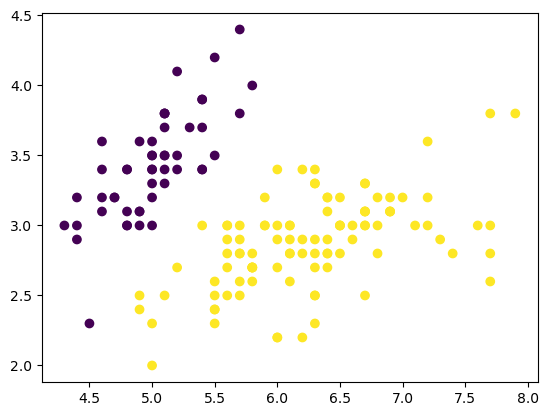

In [ ]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.9, min_samples=4)

# Generating cluster id for each row using DBSCAN algorithm
# -1 indicates the point is a noize, and does not belong to any cluster
# DBSCAN automatically chooses the number of clusters based on eps and min_samples
DataIris['PredictedClusterID']=db.fit_predict(X)
print(DataIris.head())
print('Unique cluster IDs',DataIris['PredictedClusterID'].unique())

# Plotting the predicted clusters
plt.scatter(x=DataIris['Sepal.Length'], y=DataIris['Sepal.Width'], c=DataIris['PredictedClusterID'])


# eps : float, optional
#    The maximum distance between two samples for them to be considered
#    as in the same neighborhood.

# min_samples : int, optional
#    The number of samples (or total weight) in a neighborhood for a point
#    to be considered as a core point. This includes the point itself.

## Finding Best hyperparameters for DBSCAN using Silhouette Coefficient

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value of Silhouette Coefficient is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster

In [ ]:
## Finding best values of eps and min_samples
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:

        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)

        if(len(np.unique(db.fit_predict(X)))>1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)

        silhouette_scores_data=pd.concat([silhouette_scores_data, pd.DataFrame(data=[[sil_score,trial_parameters]],
                                                                          columns=["score", "parameters"])])

In [ ]:
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,0.333368,eps:0.2 min_sample :3
